In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [14]:
house = pd.read_csv('Bengaluru_House_Data.csv')

In [15]:
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [16]:
house['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [17]:
house['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [18]:
house['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [19]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [20]:
house.shape

(13320, 9)

In [21]:
round(100*(house.isnull().sum()/len(house.index)),2)

area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64

In [22]:
house['society'].isnull().value_counts()

False    7818
True     5502
Name: society, dtype: int64

In [23]:
house['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [24]:
house[house.bath.isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.530
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
...,...,...,...,...,...,...,...,...,...
11496,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,27.000
11569,Plot Area,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.440
12768,Built-up Area,18-Mar,Bettahalsoor,5 Bedroom,Toainnt,3210,NaN,NaN,353.000
12861,Super built-up Area,21-Dec,KR Puram,4 BHK,Moquach,2204 - 2362,NaN,NaN,121.000


In [25]:
house = house[~house['bath'].isnull()]

In [26]:
import re

In [27]:
house['BHK'] = house['size'].apply(lambda x : x.split(' ')[0])

In [28]:
house = house.drop('size' , axis = 1)

In [29]:
house['size'].loc[1:][1][2:10]

KeyError: 'size'

In [30]:
house['area_type'].value_counts()

Super built-up  Area    8741
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: area_type, dtype: int64

In [31]:
house = house[~house['BHK'].isnull()]

In [32]:
house

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,4689,4.0,1.0,488.00,4


In [33]:
house['balcony'].fillna(0)

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    0.0
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13247, dtype: float64

In [34]:
house['balcony'].isnull().sum()

536

In [35]:
house[house['balcony'].isnull()]

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
6,Super built-up Area,18-May,Old Airport Road,Jaades,2732,4.0,NaN,204.00,4
7,Super built-up Area,Ready To Move,Rajaji Nagar,Brway G,3300,4.0,NaN,600.00,4
9,Plot Area,Ready To Move,Gandhi Bazar,NaN,1020,6.0,NaN,370.00,6
34,Built-up Area,Ready To Move,Kasturi Nagar,Kantsce,1925,3.0,NaN,125.00,3
40,Built-up Area,Ready To Move,Murugeshpalya,Gentson,1296,2.0,NaN,81.00,2
...,...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,Kundalahalli Colony,NaN,1400,7.0,NaN,218.00,7
13279,Plot Area,Ready To Move,Vishwanatha Nagenahalli,NaN,1200,5.0,NaN,130.00,6
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,NaN,1200,5.0,NaN,325.00,4
13309,Super built-up Area,Ready To Move,Yeshwanthpur,IBityin,1675,3.0,NaN,92.13,3


In [36]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [37]:
house[~house['total_sqft'].apply(is_float)].head(100)

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,19-Dec,Yelahanka,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,MCvarar,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...,...
6552,Plot Area,Ready To Move,5 Bedroom Farm House in Lakshmipura,NaN,24Guntha,6.0,2.0,550.000,5
6581,Super built-up Area,Ready To Move,Sarjapur Road,Shthi S,1270 - 1275,2.0,0.0,40.720,3
6587,Super built-up Area,Ready To Move,Kadugodi,RatatHa,840 - 1010,1.0,0.0,40.700,1
6592,Built-up Area,Ready To Move,Langford Town,NaN,697Sq. Meter,4.0,2.0,211.000,4


In [38]:
def sqft_to_num(x):
    token = ''
    token = x.split('-')
    if len(token) == 2:
            return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [39]:
hose = house.copy()
hose['total_sqft'] = hose['total_sqft'].apply(sqft_to_num)

In [40]:
hose

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600.0,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,4689.0,4.0,1.0,488.00,4


In [41]:
hose['availability'].value_counts()

Ready To Move    10565
18-Dec             297
18-May             291
18-Apr             269
18-Aug             200
                 ...  
15-Dec               1
20-Feb               1
16-Jul               1
14-Nov               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

In [42]:
hose = hose.drop('area_type' ,axis = 1)
hose = hose.drop('availability' , axis = 1)
hose = hose.drop('society', axis = 1)

In [43]:
hose

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Richards Town,3600.0,5.0,NaN,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [44]:
hose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13247 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13201 non-null  float64
 2   bath        13247 non-null  float64
 3   balcony     12711 non-null  float64
 4   price       13247 non-null  float64
 5   BHK         13247 non-null  object 
dtypes: float64(4), object(2)
memory usage: 724.4+ KB


In [45]:
df1 = hose.copy()

In [46]:
df1['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13247, dtype: object

In [47]:
df1.location.value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [48]:
location_stats = df1['location'].value_counts()

In [49]:
location_stats

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [50]:
location_stats.sort_values(ascending = False)

Whitefield                534
Sarjapur  Road            392
Electronic City           302
Kanakpura Road            266
Thanisandra               233
                         ... 
Rajarajesheari nagar        1
Millers Road                1
Pillahalli                  1
Yelahanka,MVIT college      1
Abshot Layout               1
Name: location, Length: 1304, dtype: int64

In [51]:
location_stats_lessthan10 = location_stats[location_stats <= 10]
location_stats_lessthan10

Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: location, Length: 1063, dtype: int64

In [52]:
df1.location = df1.location.apply(lambda x: 'others' if x in location_stats_lessthan10 else x)

In [53]:
df1.location.value_counts()

others                2896
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

df1.BHK = df1.BHK.astype('float')

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13247 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13201 non-null  float64
 2   bath        13247 non-null  float64
 3   balcony     12711 non-null  float64
 4   price       13247 non-null  float64
 5   BHK         13247 non-null  object 
dtypes: float64(4), object(2)
memory usage: 724.4+ KB


In [55]:
df1

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13316,others,3600.0,5.0,NaN,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [56]:
df1.BHK = df1.BHK.astype('float')

In [57]:
df1[(df1.total_sqft/df1.BHK) < 300]

,location,total_sqft,bath,balcony,price,BHK
9,others,1020.0,6.0,NaN,370.0,6.0
45,HSR Layout,600.0,9.0,NaN,200.0,8.0
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6.0
68,others,1350.0,7.0,0.0,85.0,8.0
70,others,500.0,3.0,2.0,100.0,3.0
...,...,...,...,...,...,...
13277,others,1400.0,7.0,NaN,218.0,7.0
13279,others,1200.0,5.0,NaN,130.0,6.0
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5.0
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5.0


In [58]:
df1 = df1[~(df1.total_sqft/df1.BHK < 300)]

In [59]:
df1

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0
13316,others,3600.0,5.0,NaN,400.00,4.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [60]:
df1 = df1.drop('balcony' , axis=1)

In [61]:
df1['price_persqft'] = (df1.price*100000 / df1.total_sqft)

In [62]:
df1

for i,k in (location & price_perssqft):
    if

,location,total_sqft,bath,price,BHK,price_persqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0,6689.834926
13316,others,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0,10407.336319


In [64]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_persqft)
        st = np.std(subdf.price_persqft)
        reduced_df = subdf[(subdf.price_persqft>(m-st)) & (subdf.price_persqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out


df2 = remove_outliers(df1)
df2.shape

(10244, 6)

In [70]:
def scatterplot_1(df,location):
    bhk2 = df2[(df2.location == location) & (df2.BHK==2)]
    bhk3 = df2[(df2.location == location) & (df2.BHK ==3)]
    plt.figure(figsize = (15,10))
    plt.scatter(bhk2.total_sqft , bhk2.price_persqft ,color ='blue' , label = '2BHK' , s=50)
    plt.scatter(bhk3.total_sqft , bhk3.price_persqft ,marker = '+' , color ='green' , label = '2BHK' , s=50 )
    plt.legend()
    

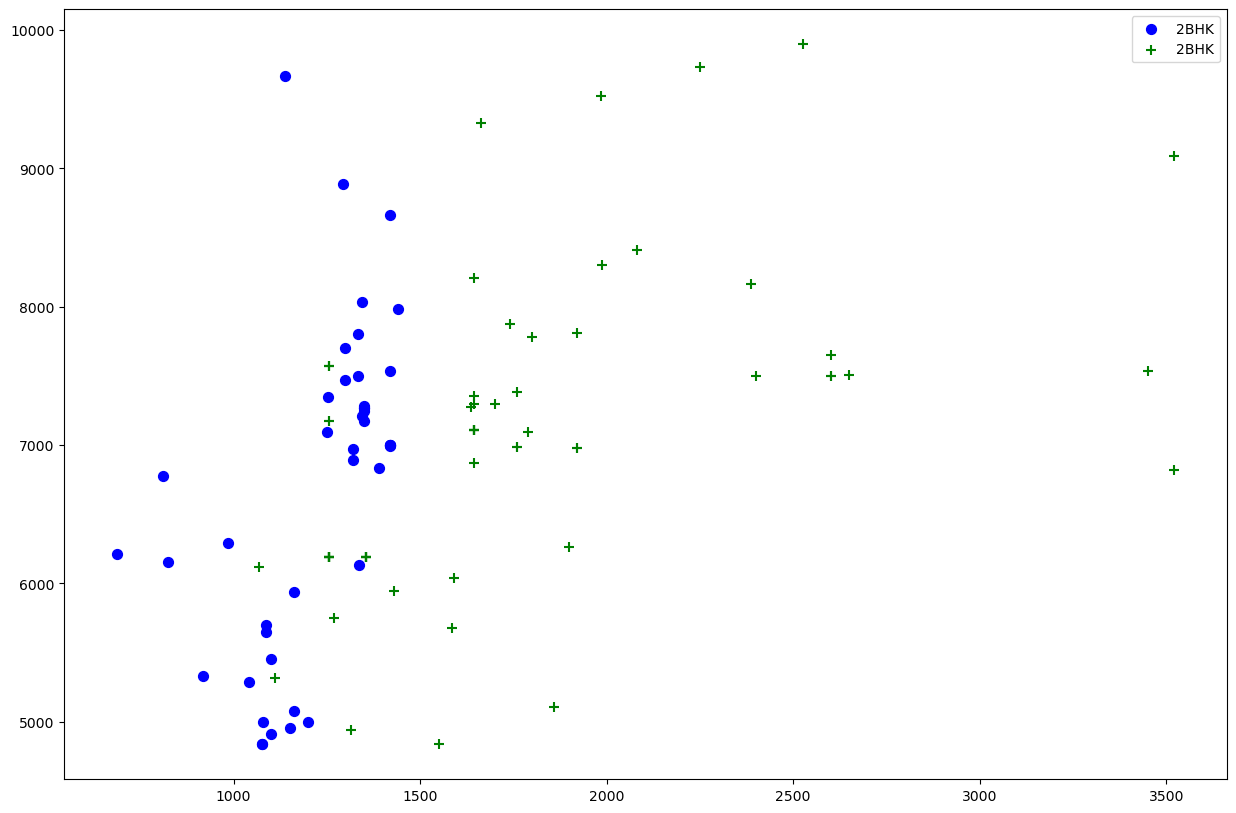

In [71]:
scatterplot_1(df2,'Hebbal')

In [74]:
df2[df2.bath > df2.BHK + 2]

,location,total_sqft,bath,price,BHK,price_persqft
1637,Chikkabanavar,2460.0,7.0,80.0,4.0,3252.032520
5232,Nagasandra,7000.0,8.0,450.0,4.0,6428.571429
6702,Thanisandra,1806.0,6.0,116.0,3.0,6423.034330
8405,others,11338.0,9.0,1000.0,6.0,8819.897689


In [78]:
df2 = df2[~(df2.bath > df2.BHK + 2)]

In [80]:
dummies = pd.get_dummies(df2.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
df3 = pd.concat([df2,dummies.drop('others' , axis=1)], axis =1)

In [83]:
df3.drop('location' , axis=1)

,total_sqft,bath,price,BHK,price_persqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,44.00,3.0,3520.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,40.00,2.0,3200.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.00,2.0,6916.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.00,2.0,3418.803419,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.00,3.0,4561.403509,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,1353.0,2.0,110.00,2.0,8130.081301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,812.0,1.0,26.00,1.0,3201.970443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,1440.0,2.0,63.93,3.0,4439.583333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10242,1075.0,2.0,48.00,2.0,4465.116279,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df3.drop('price_persqft' , axis=1)

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,44.00,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1250.0,2.0,40.00,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.00,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.00,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.00,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,others,1353.0,2.0,110.00,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,others,812.0,1.0,26.00,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,others,1440.0,2.0,63.93,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10242,others,1075.0,2.0,48.00,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
X = df3.drop('price' , axis=1)


In [113]:
X

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,1353.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,812.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,1440.0,2.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10242,1075.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
y = df3['price']
y

0         44.00
1         40.00
2         83.00
3         40.00
4         65.00
          ...  
10239    110.00
10240     26.00
10241     63.93
10242     48.00
10243    400.00
Name: price, Length: 10240, dtype: float64

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [115]:
X_train

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
550,400.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7234,825.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2516,600.0,3.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4467,907.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,1098.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,3436.0,6.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,1350.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5392,2051.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,1650.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

lm.score(X_test,y_test)

0.8322572856345929

In [117]:
print(lm.coef_)
print(lm.intercept_)

[ 7.44553294e-02  8.01281529e+00 -8.02932163e+00 -2.05796202e+01
  1.42638772e+02  2.95443331e+01 -2.84461776e+01  1.52502740e+02
 -1.20427807e+01 -1.73829965e+01  2.45511679e+01  3.72213287e+00
 -2.21068831e+01 -2.10085591e+01 -1.45864191e+01 -2.47300576e+01
 -1.71572073e+01 -7.38839482e+00 -2.07882935e+00 -1.26599400e+01
 -2.26065002e+01 -2.49975196e+01 -1.79724984e+01 -1.90353447e+01
 -1.22466534e+01 -9.52128352e+00 -1.51986415e+01  3.07735069e+00
  3.39987874e+01 -7.87031366e+00 -2.81898785e+01 -2.32134390e+00
  3.37779995e+00 -7.56085760e+00  9.91767168e+01  4.72767192e-01
 -3.21641289e+01 -2.91493476e+01 -1.04812261e+01 -6.67489909e+00
  1.50835634e+01 -1.50074928e+01  5.19553267e+01  3.94508039e+01
 -2.46869901e+01 -2.32765302e+01 -3.19208927e+01 -1.16025038e+01
  1.71522294e+02 -2.28433623e+01 -1.13549756e+01 -1.91538468e+00
  3.62314911e+01 -1.43323076e+01 -2.02141513e+01 -2.40443973e+01
 -3.49422256e+01  3.65495878e+01 -3.92573468e+00 -1.89021932e+01
 -1.03153550e+01  4.02184

In [118]:
def Evaluation(x_test, y_test, model) :
    y_pred = model.predict(x_test)    
    mse = metrics.mean_absolute_error(y_test, y_pred)
    msqe = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2_score)

In [126]:
Evaluation(X_test,y_test,lm)

mean_absolute_error :  20.213059123300837
mean_squared_error  :  1386.0660940786188
root_mean_absolute_error 37.22990859616256
R2_score            :  0.8322572856345929


In [129]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)
cross_val_score(lm, X,y , cv=cv)

array([0.86506298, 0.74332347, 0.86443211, 0.79565781, 0.80089592])

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def best_model_using_gridsearchcv(X,y):
    algos = {
        'LnearRegression':{
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True,False]
                }
            },
        'lasso': {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random' , 'cyclic']
                }
            },
        'decision Tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse' , 'friedman_mse'],
                'splitter' : ['best','random']
                }
            }
        }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'] , cv=cv , return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params': gs.best_params_
    })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [165]:
best_model_using_gridsearchcv(X,y)

C:\Users\97450\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\97450\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,LnearRegression,0.813874,{'normalize': False}
1,lasso,0.682721,"{'alpha': 1, 'selection': 'random'}"
2,decision Tree,0.709711,"{'criterion': 'mse', 'splitter': 'random'}"
